In [1]:
import pandas as pd

# Load the churn dataset
file_path = '../data/churn.csv'
churn_data = pd.read_csv(file_path)

# Display basic information about the dataset
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   Technology Primary            36992 non-null  object 
 2   joining_date                  36992 non-null  object 
 3   joined_through_referral       36992 non-null  object 
 4   referral_id                   36992 non-null  object 
 5   preferred_offer_types         36704 non-null  object 
 6   last_visit_time               36992 non-null  object 
 7   days_since_last_login         36992 non-null  int64  
 8   avg_time_spent                36992 non-null  float64
 9   Opportunity Size (USD)        36992 non-null  float64
 10  avg_frequency_login_days      36992 non-null  object 
 11  points_in_wallet              33549 non-null  float64
 12  used_special_discount         36992 non-null  object 
 13  o

In [2]:
# Convert column names to lowercase and replace spaces with underscores
churn_data.columns = churn_data.columns.str.lower().str.replace(' ', '_')

churn_data.columns = churn_data.columns.str.lower().str.replace(r'[^a-zA-Z0-9_]', '_')

churn_data = churn_data.rename(columns={'opportunity_size_(usd)': 'opportunity_size_usd'})

churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   technology_primary            36992 non-null  object 
 2   joining_date                  36992 non-null  object 
 3   joined_through_referral       36992 non-null  object 
 4   referral_id                   36992 non-null  object 
 5   preferred_offer_types         36704 non-null  object 
 6   last_visit_time               36992 non-null  object 
 7   days_since_last_login         36992 non-null  int64  
 8   avg_time_spent                36992 non-null  float64
 9   opportunity_size_usd          36992 non-null  float64
 10  avg_frequency_login_days      36992 non-null  object 
 11  points_in_wallet              33549 non-null  float64
 12  used_special_discount         36992 non-null  object 
 13  o

In [3]:
# Check for missing values
missing_values = churn_data.isnull().sum()

# Summarize the statistical properties of numerical columns
numerical_summary = churn_data.describe()

# Explore the distribution of categorical variables
categorical_columns = churn_data.select_dtypes(include=['object']).columns
categorical_distribution = churn_data[categorical_columns].describe()

# Analyze the target variable `churn`
churn_distribution = churn_data['churn'].value_counts()

missing_values, numerical_summary, categorical_distribution, churn_distribution

(age                                0
 technology_primary                 0
 joining_date                       0
 joined_through_referral            0
 referral_id                        0
 preferred_offer_types            288
 last_visit_time                    0
 days_since_last_login              0
 avg_time_spent                     0
 opportunity_size_usd               0
 avg_frequency_login_days           0
 points_in_wallet                3443
 used_special_discount              0
 offer_application_preference       0
 past_complaint                     0
 complaint_status                   0
 feedback                           0
 churn                              0
 dtype: int64,
                 age  days_since_last_login  avg_time_spent   
 count  36992.000000           36992.000000    36992.000000  \
 mean      37.118161             -41.915576      243.472334   
 std       15.867412             228.819900      398.289149   
 min       10.000000            -999.000000    -2

In [4]:
# Dropping the 'joining_date' and 'referral_id' columns as they are not needed for analysis
churn_data_cleaned = churn_data.drop(['joining_date', 'referral_id'], axis=1)

# Display the first few rows of the modified dataset
churn_data_cleaned.head()


,age,technology_primary,joined_through_referral,preferred_offer_types,last_visit_time,days_since_last_login,avg_time_spent,opportunity_size_usd,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn
0,18,Analytics,No,Gift Vouchers/Coupons,16:08:02,17,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Intuitive User Interface,0
1,32,ERP Implementation,?,Gift Vouchers/Coupons,12:38:13,16,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Proactive Issue Resolution,0
2,44,ERP Implementation,Yes,Gift Vouchers/Coupons,22:53:21,14,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Unhelpful Online Resources,1
3,37,ERP Implementation,Yes,Gift Vouchers/Coupons,15:57:50,11,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Unhelpful Online Resources,1
4,31,Technical Business Solutions,No,Credit/Debit Card Offers,15:46:44,20,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Unhelpful Online Resources,1


In [5]:
import numpy as np

# Handling missing data
# For categorical data, we'll replace missing values with the mode (most frequent value)
# For numerical data, we'll replace missing values with the median

# Identifying columns with missing values
missing_value_columns = churn_data_cleaned.columns[churn_data_cleaned.isnull().any()].tolist()

# Replace missing values
for col in missing_value_columns:
    if churn_data_cleaned[col].dtype == 'object':
        # Replace missing categorical data with mode
        churn_data_cleaned[col].fillna(churn_data_cleaned[col].mode()[0], inplace=True)
    else:
        # Replace missing numerical data with median
        churn_data_cleaned[col].fillna(churn_data_cleaned[col].median(), inplace=True)

# Data Transformation
# Converting 'Yes'/'No' responses to binary (1/0)
binary_columns = ['joined_through_referral', 'used_special_discount', 'offer_application_preference', 'past_complaint']

for col in binary_columns:
    churn_data_cleaned[col] = churn_data_cleaned[col].map({'Yes': 1, 'No': 0, '?': 0}) # Treating '?' as 'No'

# Statistical Summary
numerical_summary = churn_data_cleaned.describe(include=[np.number])
categorical_summary = churn_data_cleaned.describe(include=[object])  # Change np.object to object

numerical_summary, categorical_summary

(                age  joined_through_referral  days_since_last_login   
 count  36992.000000             36992.000000           36992.000000  \
 mean      37.118161                 0.424822             -41.915576   
 std       15.867412                 0.494323             228.819900   
 min       10.000000                 0.000000            -999.000000   
 25%       23.000000                 0.000000               8.000000   
 50%       37.000000                 0.000000              12.000000   
 75%       51.000000                 1.000000              16.000000   
 max       64.000000                 1.000000              26.000000   
 
        avg_time_spent  opportunity_size_usd  points_in_wallet   
 count    36992.000000          36992.000000      36992.000000  \
 mean       243.472334          29271.194003        687.881611   
 std        398.289149          19444.806226        184.838004   
 min      -2814.109110            800.460000       -760.660000   
 25%         60.1025

In [6]:
# Removing rows where 'avg_time_spent' has negative values
churn_data_cleaned = churn_data_cleaned[churn_data_cleaned['avg_time_spent'] >= 0]

# Display the first few rows of the modified dataset to confirm the changes
churn_data_cleaned.head()

,age,technology_primary,joined_through_referral,preferred_offer_types,last_visit_time,days_since_last_login,avg_time_spent,opportunity_size_usd,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn
0,18,Analytics,0,Gift Vouchers/Coupons,16:08:02,17,300.63,53005.25,17,781.75,1,1,0,Not Applicable,Intuitive User Interface,0
1,32,ERP Implementation,0,Gift Vouchers/Coupons,12:38:13,16,306.34,12838.38,10,697.62,1,0,1,Solved,Proactive Issue Resolution,0
2,44,ERP Implementation,1,Gift Vouchers/Coupons,22:53:21,14,516.16,21027.00,22,500.69,0,1,1,Solved in Follow-up,Unhelpful Online Resources,1
3,37,ERP Implementation,1,Gift Vouchers/Coupons,15:57:50,11,53.27,25239.56,6,567.66,0,1,1,Unsolved,Unhelpful Online Resources,1
4,31,Technical Business Solutions,0,Credit/Debit Card Offers,15:46:44,20,113.13,24483.66,16,663.06,0,1,1,Solved,Unhelpful Online Resources,1


In [7]:
# Counting the number of rows with unusual/negative values in 'Days Since Last Login' and 'Points in Wallet'

# Count of rows with unusual values in 'Days Since Last Login' (e.g., -999)
unusual_login_days_count = churn_data_cleaned[churn_data_cleaned['days_since_last_login'] < 0].shape[0]

# Count of rows with negative values in 'Points in Wallet'
negative_points_count = churn_data_cleaned[churn_data_cleaned['points_in_wallet'] < 0].shape[0]

unusual_login_days_count, negative_points_count

(1915, 124)

In [8]:
# Total number of rows in the dataset
total_rows = churn_data_cleaned.shape[0]
total_rows

35273

In [9]:
# Removing rows with unusual values in 'Days Since Last Login' and negative values in 'Points in Wallet'
churn_data_cleaned = churn_data_cleaned[churn_data_cleaned['days_since_last_login'] >= 0]
churn_data_cleaned = churn_data_cleaned[churn_data_cleaned['points_in_wallet'] >= 0]

# New count of total rows after removal
new_total_rows = churn_data_cleaned.shape[0]
new_total_rows

33242

In [10]:
import pandas as pd

# Convert 'last_visit_time' to datetime
churn_data_cleaned['last_visit_time'] = pd.to_datetime(churn_data_cleaned['last_visit_time'])

# Extract the hour component
churn_data_cleaned['last_visit_hour'] = churn_data_cleaned['last_visit_time'].dt.hour

# Displaying the first few rows to verify the transformation
transformed_last_visit_time = churn_data_cleaned[['last_visit_time', 'last_visit_hour']].head()

transformed_last_visit_time

C:\Users\asus\AppData\Local\Temp\ipykernel_41656\1039829055.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  churn_data_cleaned['last_visit_time'] = pd.to_datetime(churn_data_cleaned['last_visit_time'])


,last_visit_time,last_visit_hour
0,2024-01-15 16:08:02,16
1,2024-01-15 12:38:13,12
2,2024-01-15 22:53:21,22
3,2024-01-15 15:57:50,15
4,2024-01-15 15:46:44,15


In [11]:
from sklearn.preprocessing import LabelEncoder

# Step 2: Categorical Variable Encoding
# Using Label Encoding for simplicity. One-hot encoding can be used for non-ordinal variables if needed.
label_encoder = LabelEncoder()

# Identifying categorical columns to be encoded
categorical_cols = churn_data_cleaned.select_dtypes(include=['object']).columns

# Applying label encoding to each categorical column
for col in categorical_cols:
    churn_data_cleaned[col] = label_encoder.fit_transform(churn_data_cleaned[col])

# Displaying the first few rows to verify the encoding
encoded_data_preview = churn_data_cleaned.head()

encoded_data_preview

,age,technology_primary,joined_through_referral,preferred_offer_types,last_visit_time,days_since_last_login,avg_time_spent,opportunity_size_usd,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn,last_visit_hour
0,18,0,0,1,2024-01-15 16:08:02,17,300.63,53005.25,561,781.75,1,1,0,1,2,0,16
1,32,1,0,1,2024-01-15 12:38:13,16,306.34,12838.38,549,697.62,1,0,1,2,4,0,12
2,44,1,1,1,2024-01-15 22:53:21,14,516.16,21027.00,591,500.69,0,1,1,3,7,1,22
3,37,1,1,1,2024-01-15 15:57:50,11,53.27,25239.56,1282,567.66,0,1,1,4,7,1,15
4,31,3,0,0,2024-01-15 15:46:44,20,113.13,24483.66,559,663.06,0,1,1,2,7,1,15


In [12]:
# Providing a detailed statistical summary of the transformed dataset
detailed_statistical_summary = churn_data_cleaned.describe()

# Displaying the statistical summary
detailed_statistical_summary

,age,technology_primary,joined_through_referral,preferred_offer_types,last_visit_time,days_since_last_login,avg_time_spent,opportunity_size_usd,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn,last_visit_hour
count,33242.000000,33242.000000,33242.000000,33242.000000,33242,33242.000000,33242.000000,33242.000000,33242.000000,33242.000000,33242.000000,33242.000000,33242.000000,33242.000000,33242.000000,33242.000000,33242.000000
mean,37.100776,1.735214,0.425155,0.994555,2024-01-15 12:02:10.161602560,12.767403,292.848496,29296.812176,774.653631,691.311918,0.550147,0.552885,0.496450,1.624481,3.600535,0.538927,11.533512
min,10.000000,0.000000,0.000000,0.000000,2024-01-15 00:00:00,1.000000,1.837399,800.460000,0.000000,6.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,0.000000,0.000000,2024-01-15 06:04:21.750000128,9.000000,71.612500,14222.540000,559.000000,625.710000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000
50%,37.000000,1.000000,0.000000,1.000000,2024-01-15 12:01:22.500000,13.000000,174.030000,27572.810000,592.000000,697.620000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,12.000000
75%,51.000000,3.000000,1.000000,2.000000,2024-01-15 17:59:36,17.000000,371.452500,40845.890000,1176.000000,757.327500,1.000000,1.000000,1.000000,2.000000,6.000000,1.000000,17.000000
max,64.000000,3.000000,1.000000,2.000000,2024-01-15 23:59:59,26.000000,3235.578521,99914.050000,1297.000000,2069.070000,1.000000,1.000000,1.000000,4.000000,8.000000,1.000000,23.000000
std,15.860160,0.964634,0.494374,0.812051,NaN,5.567312,332.028318,19465.988542,322.261774,177.023856,0.497486,0.497203,0.499995,1.214458,2.697256,0.498490,6.918959


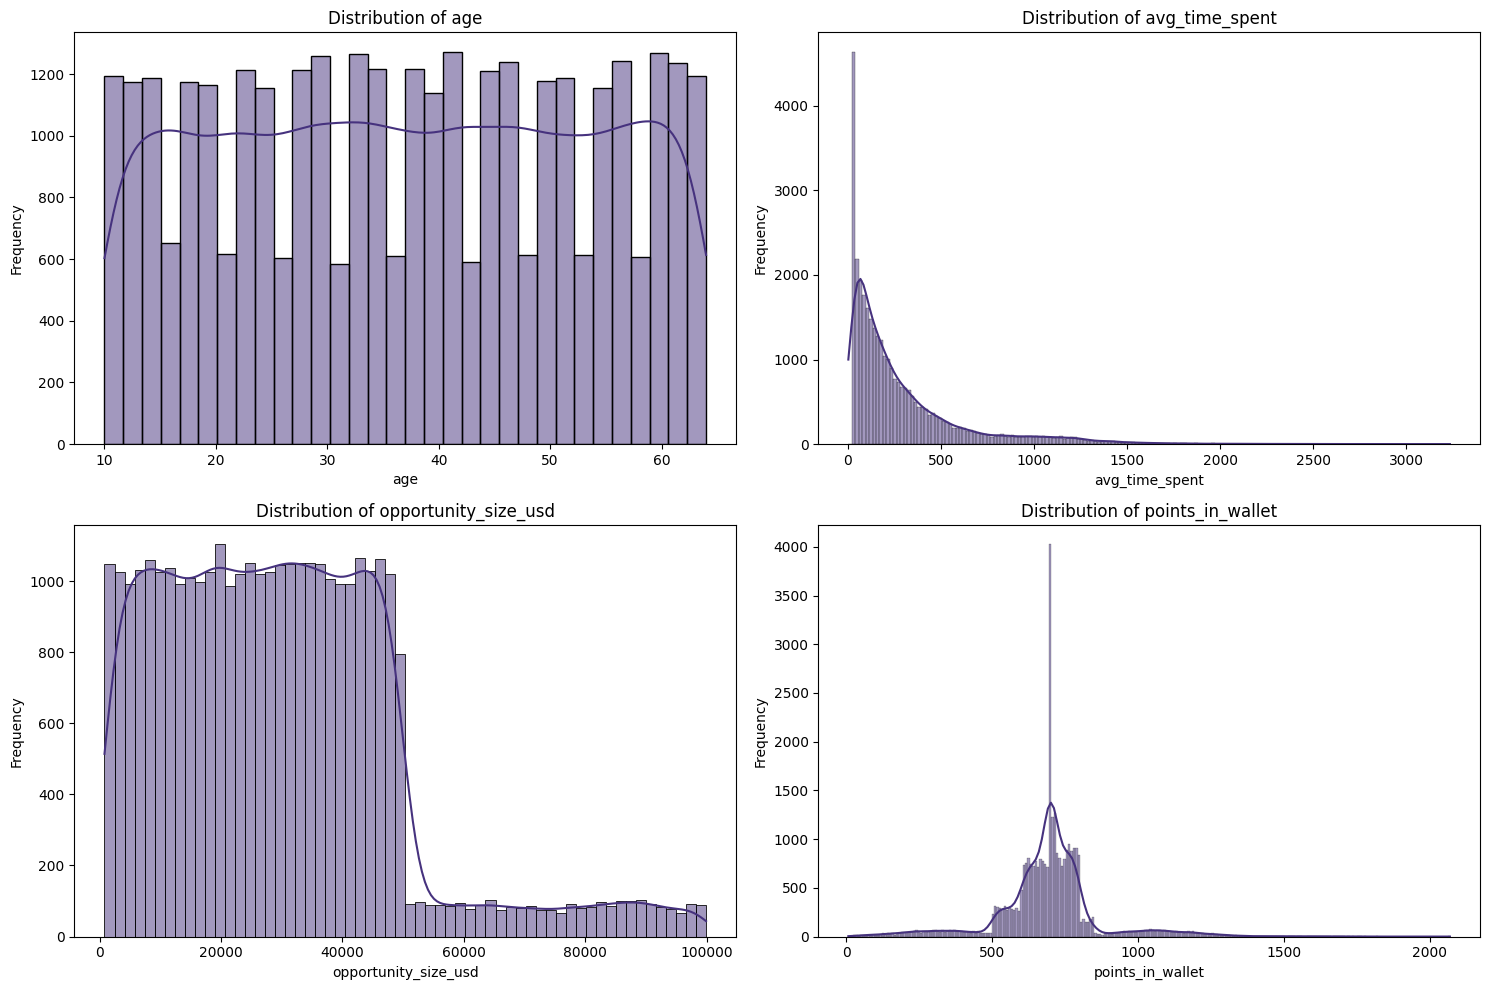

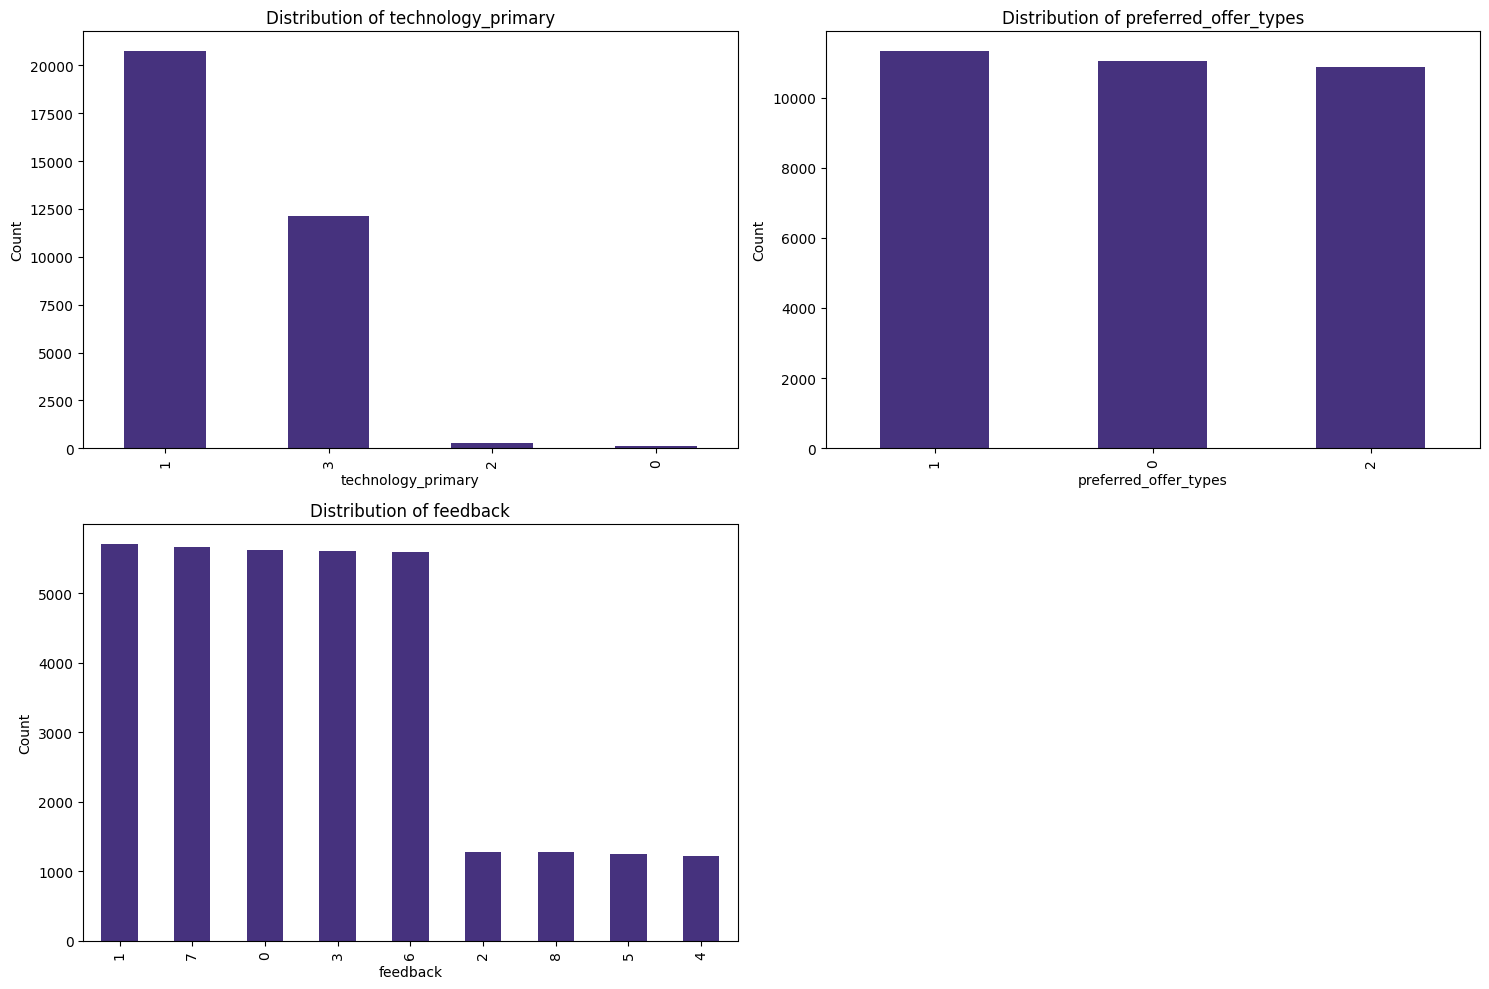

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a color palette for the visualizations
sns.set_palette("viridis")

# Selecting a few numerical and categorical features for visualization
numerical_features = ['age', 'avg_time_spent', 'opportunity_size_usd', 'points_in_wallet']
categorical_features = ['technology_primary', 'preferred_offer_types', 'feedback']

# Creating histograms for numerical features
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(churn_data_cleaned[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Creating bar charts for categorical features
plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    churn_data_cleaned[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

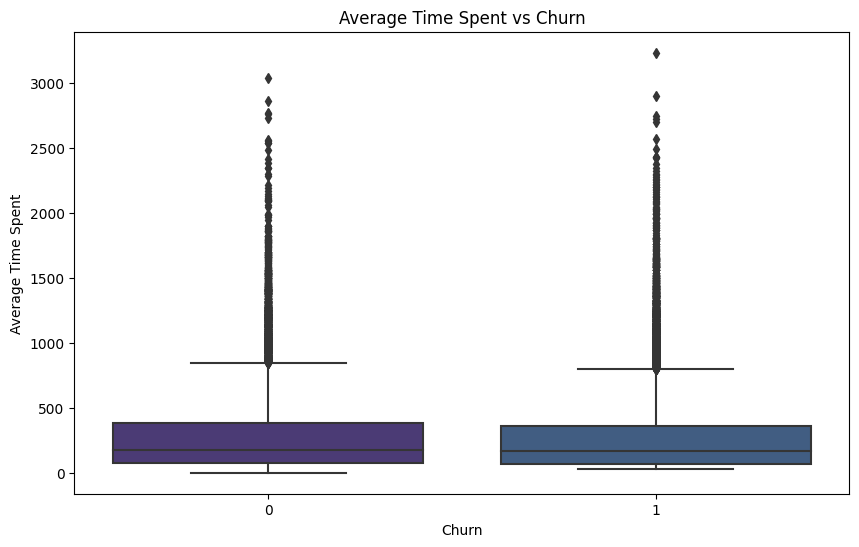

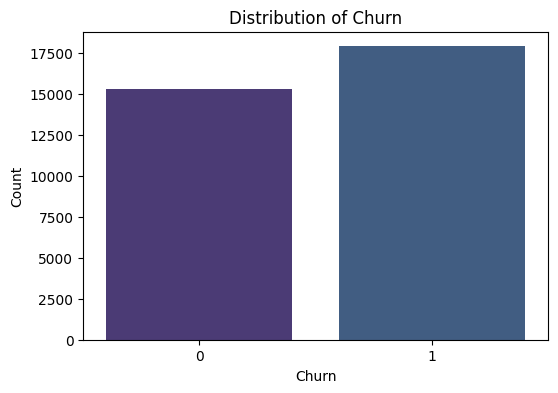

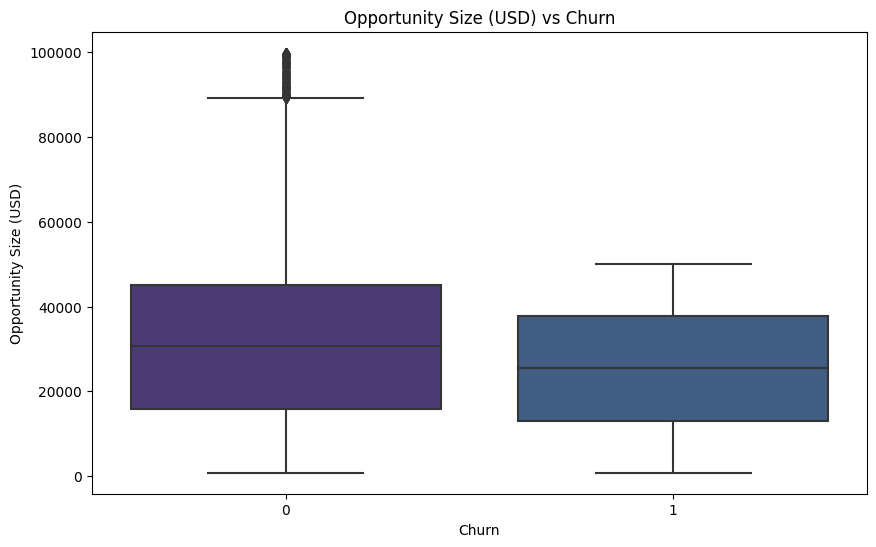

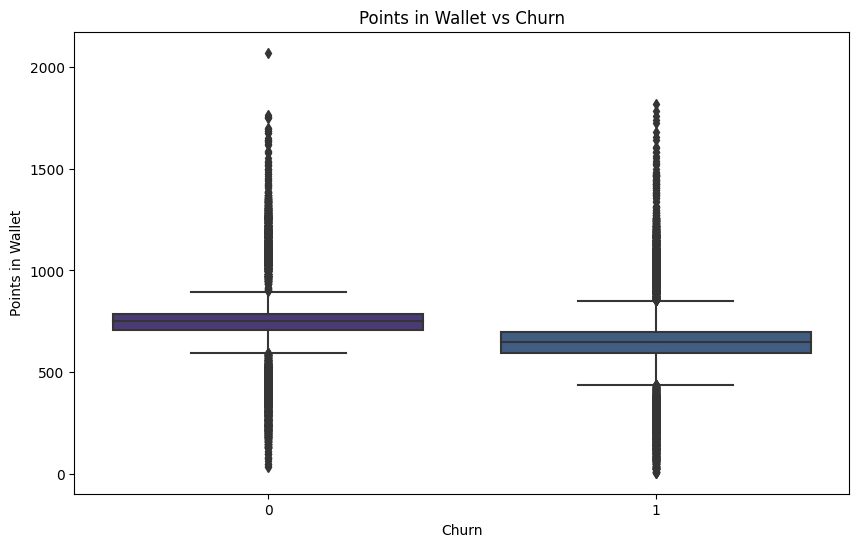

In [14]:
# Additional visualizations

# Visualization 1: Box plot for 'Average Time Spent' by 'Churn'
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='avg_time_spent', data=churn_data_cleaned)
plt.title('Average Time Spent vs Churn')
plt.xlabel('Churn')
plt.ylabel('Average Time Spent')
plt.show()

# Visualization 2: Count plot for 'Churn' distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=churn_data_cleaned)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Visualization 3: Box plot for 'Opportunity Size (USD)' by 'Churn'
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='opportunity_size_usd', data=churn_data_cleaned)
plt.title('Opportunity Size (USD) vs Churn')
plt.xlabel('Churn')
plt.ylabel('Opportunity Size (USD)')
plt.show()

# Visualization 4: Box plot for 'Points in Wallet' by 'Churn'
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='points_in_wallet', data=churn_data_cleaned)
plt.title('Points in Wallet vs Churn')
plt.xlabel('Churn')
plt.ylabel('Points in Wallet')
plt.show()

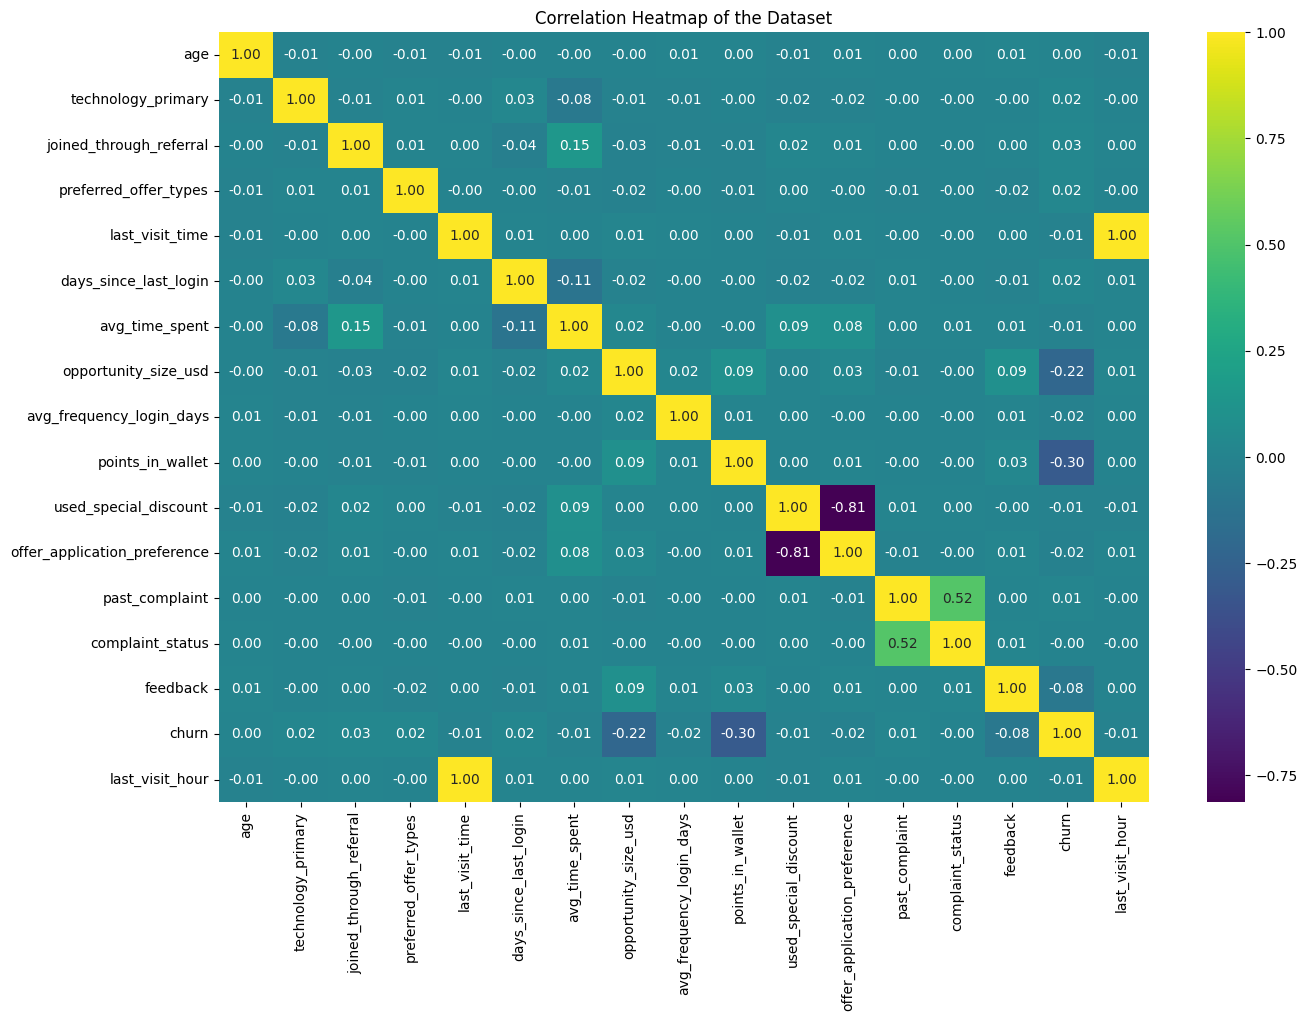

In [15]:
# Correlation Analysis
# Computing the correlation matrix
correlation_matrix = churn_data_cleaned.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Heatmap of the Dataset')
plt.show()

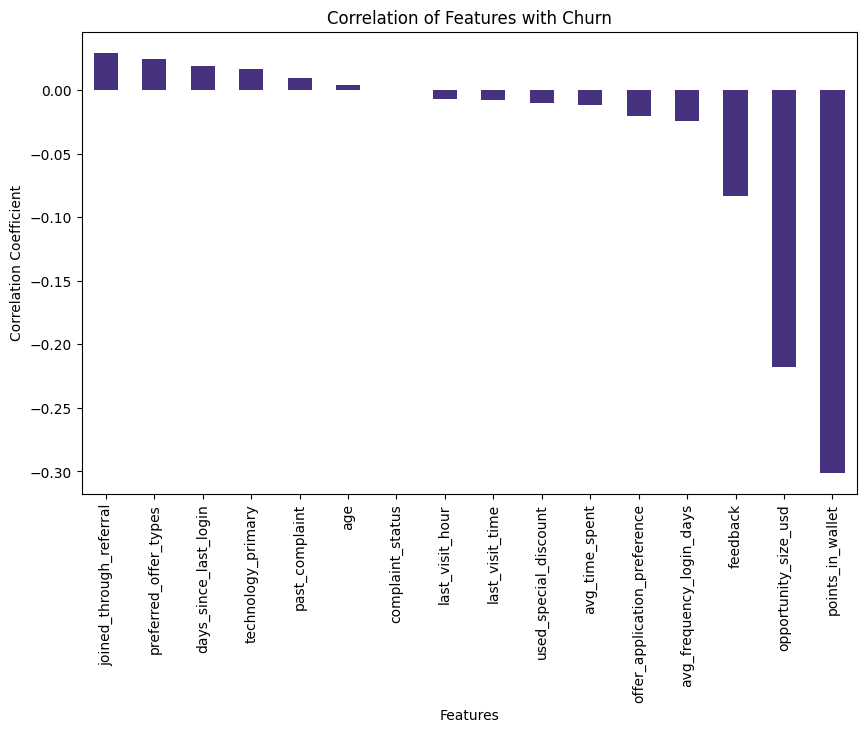

In [16]:
# Detailed Correlation Analysis
# Focusing on correlations with 'Churn' and other key features

# Extracting correlations with 'Churn'
churn_correlations = correlation_matrix['churn'].sort_values(ascending=False)

# Plotting the correlations with 'Churn'
plt.figure(figsize=(10, 6))
churn_correlations.drop('churn').plot(kind='bar')
plt.title('Correlation of Features with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Feature Selection
# Selecting features based on EDA and correlation analysis
selected_features = ['points_in_wallet', 'opportunity_size_usd', 'feedback', 
                     'joined_through_referral', 'preferred_offer_types', 'days_since_last_login',
                     'technology_primary', 'past_complaint']

# Define numerical and categorical features
numerical_features = ['points_in_wallet', 'opportunity_size_usd', 'days_since_last_login']
categorical_features = ['feedback', 'joined_through_referral', 'preferred_offer_types', 'technology_primary', 'past_complaint']

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['points_in_wallet', 'opportunity_size_usd',
                                  'days_since_last_login']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['feedback', 'joined_through_referral',
                                  'preferred_offer_types', 'technology_primary',
                                  'past_complaint'])])

In [18]:
# Assuming 'churn_data_cleaned' is your cleaned dataset
# Preparing the data
X = churn_data_cleaned[selected_features]
y = churn_data_cleaned['churn']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  

In [20]:
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

In [21]:
#Baseline Model
# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.6077605654985712
precision:  0.6290366350067843
recall:  0.6513065467828042
f1_score:  0.607090035971918


In [22]:
### Trying other machine learning algorithms: SVC
svc_model = modeling(SVC, 'SVC Classification')

SVC Classification
accuracy:  0.6131749135208302
precision:  0.5805188448360254
recall:  0.9997190221972464
f1_score:  0.5267901551776359


In [23]:
#Random forest
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy:  0.8566701759663107
precision:  0.8480235042735043
recall:  0.8921045237426243
f1_score:  0.8562740844356137


In [24]:
#Decision tree
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.8235824936080614
precision:  0.8362457722660653
recall:  0.8336611407698792
f1_score:  0.8236026936710122


In [25]:
#Naive bayes 
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

Naive Bayes Classification
accuracy:  0.6429538276432546
precision:  0.6266837716484926
recall:  0.8235459398707502
f1_score:  0.6277586901830522


In [26]:
# Dictionary to store the performance metrics for each model
model_performance = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1_Score': []
}

# Function to train, evaluate and update performance metrics
def train_evaluate_update(model, model_name):
    # Train
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Update performance
    model_performance['Model'].append(model_name)
    model_performance['Accuracy'].append(accuracy_score(y_test, y_pred))
    model_performance['Precision'].append(precision_score(y_test, y_pred))
    model_performance['Recall'].append(recall_score(y_test, y_pred))
    model_performance['F1_Score'].append(f1_score(y_test, y_pred, average='weighted'))

# Logistic Regression
train_evaluate_update(LogisticRegression(), 'Logistic Regression')

# SVC
train_evaluate_update(SVC(), 'SVC')

# Random Forest
train_evaluate_update(RandomForestClassifier(), 'Random Forest')

# Decision Tree
train_evaluate_update(DecisionTreeClassifier(), 'Decision Tree')

# Naive Bayes
train_evaluate_update(GaussianNB(), 'Naive Bayes')

# Convert the dictionary to DataFrame for a tabular view
performance_df = pd.DataFrame(model_performance)

# Display the DataFrame
print(performance_df)

                 Model  Accuracy  Precision    Recall  F1_Score
0  Logistic Regression  0.607761   0.629037  0.651307  0.607090
1                  SVC  0.613175   0.580519  0.999719  0.526790
2        Random Forest  0.857422   0.850470  0.890138  0.857079
3        Decision Tree  0.828395   0.839607  0.839843  0.828393
4          Naive Bayes  0.642954   0.626684  0.823546  0.627759


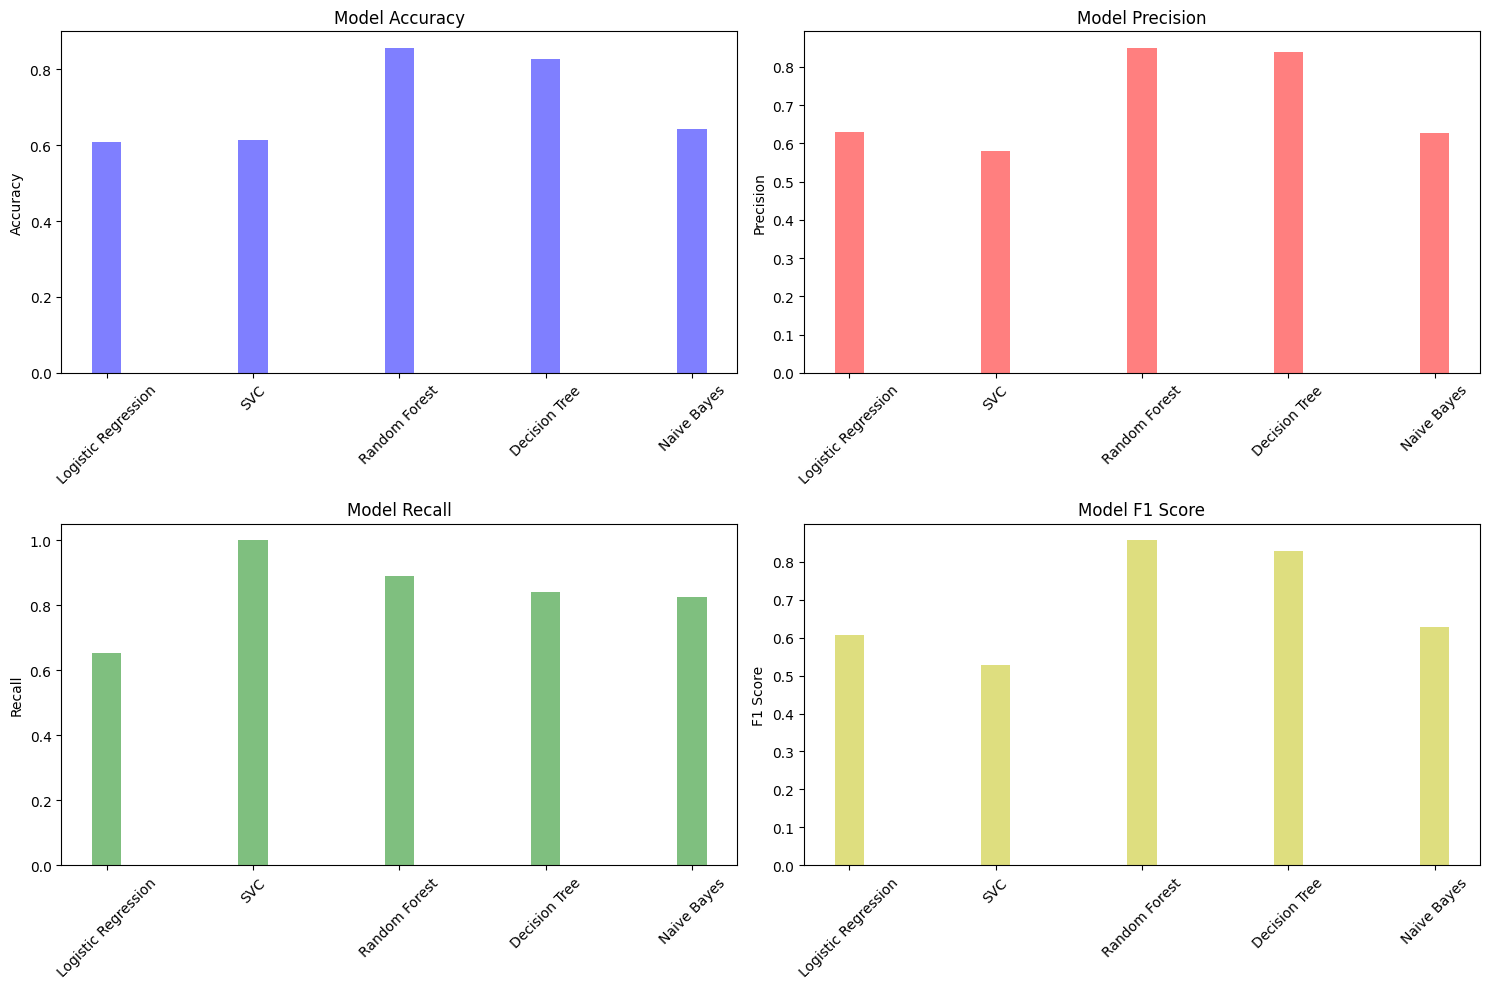

In [27]:
import matplotlib.pyplot as plt
import numpy as np

#Assuming performance_df is already defined and contains the performance metrics
models = performance_df['Model']
accuracy = performance_df['Accuracy']
precision = performance_df['Precision']
recall = performance_df['Recall']
f1_score = performance_df['F1_Score']

# Set the positions and width for the bars
pos = np.arange(len(models))
bar_width = 0.2

# Plotting each metric in a separate subplot
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy Plot
ax[0, 0].bar(pos, accuracy, bar_width, alpha=0.5, color='b', label='Accuracy')
ax[0, 0].set_title('Model Accuracy')
ax[0, 0].set_xticks(pos)
ax[0, 0].set_xticklabels(models, rotation=45)
ax[0, 0].set_ylabel('Accuracy')

# Precision Plot
ax[0, 1].bar(pos, precision, bar_width, alpha=0.5, color='r', label='Precision')
ax[0, 1].set_title('Model Precision')
ax[0, 1].set_xticks(pos)
ax[0, 1].set_xticklabels(models, rotation=45)
ax[0, 1].set_ylabel('Precision')

# Recall Plot
ax[1, 0].bar(pos, recall
, bar_width, alpha=0.5, color='g', label='Recall')
ax[1, 0].set_title('Model Recall')
ax[1, 0].set_xticks(pos)
ax[1, 0].set_xticklabels(models, rotation=45)
ax[1, 0].set_ylabel('Recall')

#F1 Score Plot
ax[1, 1].bar(pos, f1_score, bar_width, alpha=0.5, color='y', label='F1 Score')
ax[1, 1].set_title('Model F1 Score')
ax[1, 1].set_xticks(pos)
ax[1, 1].set_xticklabels(models, rotation=45)
ax[1, 1].set_ylabel('F1 Score')

#Layout adjustments
plt.tight_layout()

#Display the plots
plt.show()

In [28]:
def create_pipeline(classifier):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    return pipeline

# Create the Random Forest pipeline
rf_pipeline = create_pipeline(RandomForestClassifier(random_state=42))
rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['points_in_wallet',
                                                   'opportunity_size_usd',
                                                   'days_since_last_login']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['feedback',
                                                   'joined_through_referral',
                                                   'preferred_offer_types',
                                                   'technology_primary',
                                                   'past_complaint'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1_Score': f1_score(y_test, y_pred, average='weighted')
    }
    return scores

#Example usage
rf_pipeline = create_pipeline(RandomForestClassifier(random_state=42))
rf_scores = evaluate_model(rf_pipeline, X_train, y_train, X_test, y_test)

#Print the scores for Random Forest
print("Random Forest Classifier Scores:")
for metric, score in rf_scores.items():
    print(f"{metric}: {score:.2f}")

Random Forest Classifier Scores:
Accuracy: 0.86
Precision: 0.85
Recall: 0.89
F1_Score: 0.86


In [30]:
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=1)

# Define evaluation strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Define search space
space = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define search
search = RandomizedSearchCV(rf_model, space, n_iter=50, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

#Execute search
result = search.fit(X_train, y_train)

#Summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

#Storing the best model for later use
best_rf_model = result.best_estimator_

Best Score: 0.8734631995545192
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}


In [31]:
# Apply the best hyperparameters to the RandomForestClassifier
optimized_rf = RandomForestClassifier(**result.best_params_, random_state=42)

In [32]:
from sklearn.metrics import classification_report, roc_auc_score

# Train and evaluate the optimized model
optimized_rf.fit(X_train, y_train)
y_pred_optimized = optimized_rf.predict(X_test)

print("Optimized RandomForestClassifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("Precision:", precision_score(y_test, y_pred_optimized))
print("Recall:", recall_score(y_test, y_pred_optimized))
print("F1 Score:", f1_score(y_test, y_pred_optimized, average='weighted'))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_optimized))
print("\nClassification Report:\n", classification_report(y_test, y_pred_optimized))

Optimized RandomForestClassifier Evaluation:
Accuracy: 0.8681004662355242
Precision: 0.8564593301435407
Recall: 0.9053104804720427
F1 Score: 0.8676892645286758
ROC-AUC Score: 0.8652765994593222

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85      3090
           1       0.86      0.91      0.88      3559

    accuracy                           0.87      6649
   macro avg       0.87      0.87      0.87      6649
weighted avg       0.87      0.87      0.87      6649



In [33]:
# Feature Importance Analysis
feature_importances = optimized_rf.feature_importances_

# Assuming 'preprocessor' and 'selected_features' are defined as before
feature_names = selected_features # Adjust if different features are used
importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances}).sort_values(by='importance', ascending=False)

print("\nFeature Importances:\n", importances_df)



Feature Importances:
                    feature  importance
0         points_in_wallet    0.822634
1     opportunity_size_usd    0.105734
2                 feedback    0.054942
5    days_since_last_login    0.009188
4    preferred_offer_types    0.002332
6       technology_primary    0.002024
7           past_complaint    0.001580
3  joined_through_referral    0.001565


In [34]:
# Save the DataFrame for later use
importances_df.to_csv('feature_importances.csv', index=False)

In [35]:
# Saving the best model
import joblib

filename = 'rf_model.sav'
joblib.dump(optimized_rf, filename)

print(f"Model saved as '{filename}'.")


Model saved as 'rf_model.sav'.


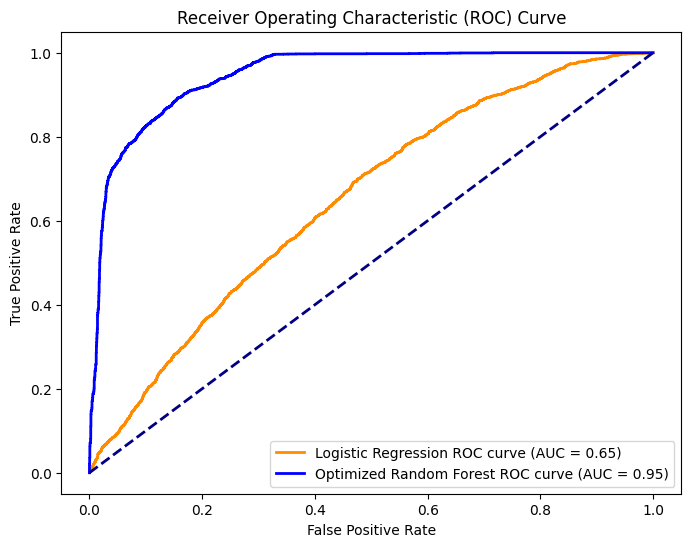

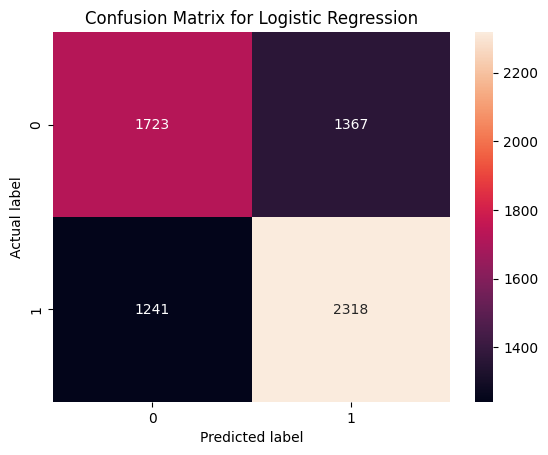

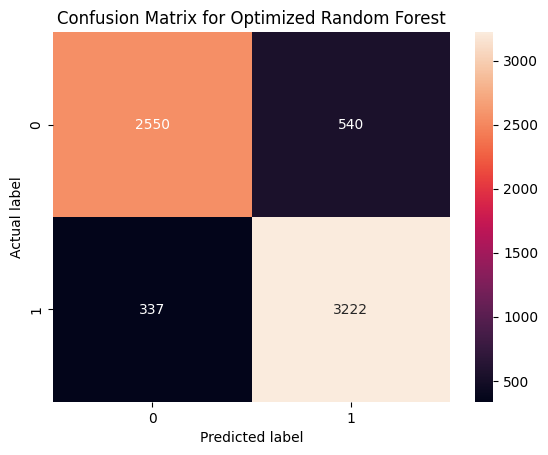

In [40]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute ROC curves and AUCs for both models
fpr_log_model, tpr_log_model, thresholds_log_model = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
roc_auc_log_model = auc(fpr_log_model, tpr_log_model)

fpr_optimized_rf, tpr_optimized_rf, thresholds_optimized_rf = roc_curve(y_test, optimized_rf.predict_proba(X_test)[:, 1])
roc_auc_optimized_rf = auc(fpr_optimized_rf, tpr_optimized_rf)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_model, tpr_log_model, color='darkorange', lw=2, label='Logistic Regression ROC curve (AUC = %0.2f)' % roc_auc_log_model)
plt.plot(fpr_optimized_rf, tpr_optimized_rf, color='blue', lw=2, label='Optimized Random Forest ROC curve (AUC = %0.2f)' % roc_auc_optimized_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Function to plot ROC Curve
def plot_roc_curve(model, X_test, y_test, model_name):
    # Predict probabilities
    probas_ = model.predict_proba(X_test)
    # Compute ROC curve and area under the curve (AUC)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=1, label=f'{model_name} (AUC = %0.2f)' % roc_auc)
    
def plot_conf_matrix(model, X_test, y_test, title):
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(title)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

# Plotting confusion matrix for Logistic Regression (Model 1)
plot_conf_matrix(log_model, X_test, y_test, "Confusion Matrix for Logistic Regression")

# Plotting confusion matrix for Optimized Random Forest (Model 2)
plot_conf_matrix(optimized_rf, X_test, y_test, "Confusion Matrix for Optimized Random Forest")

